In [188]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=FutureWarning)
from matplotlib import rcParams
rcParams["figure.figsize"] = 12, 6
sns.set_style('darkgrid')

In [189]:
df = pd.read_csv("datasets/laptopData.csv")
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1.0,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2.0,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3.0,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [190]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1273 non-null   float64
 1   Company           1273 non-null   object 
 2   TypeName          1273 non-null   object 
 3   Inches            1273 non-null   object 
 4   ScreenResolution  1273 non-null   object 
 5   Cpu               1273 non-null   object 
 6   Ram               1273 non-null   object 
 7   Memory            1273 non-null   object 
 8   Gpu               1273 non-null   object 
 9   OpSys             1273 non-null   object 
 10  Weight            1273 non-null   object 
 11  Price             1273 non-null   float64
dtypes: float64(2), object(10)
memory usage: 122.3+ KB


In [191]:
df.describe()

,Unnamed: 0,Price
count,1273.000000,1273.000000
mean,652.674784,59955.814073
std,376.493027,37332.251005
min,0.000000,9270.720000
25%,327.000000,31914.720000
50%,652.000000,52161.120000
75%,980.000000,79333.387200
max,1302.000000,324954.720000


In [192]:
df = df.drop(columns=["Unnamed: 0"]) # dropping index column
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [193]:
df["Price"] = df["Price"] / 83 # changing currency from INR to USD
df["Price"]

0        859.984135
1        577.054496
2        369.108434
3       1628.859470
4       1157.780819
           ...     
1298     409.549880
1299     962.249639
1300     147.001446
1301     490.432771
1302     236.871325
Name: Price, Length: 1303, dtype: float64

In [194]:
df["Price"] = df["Price"].round(2) # rounding to 2 decimal points
df

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,859.98
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,577.05
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,369.11
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,1628.86
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1157.78
...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,409.55
1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,962.25
1300,Lenovo,Notebook,14,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,147.00
1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,490.43


In [195]:
df["Touchscreen"] = df["ScreenResolution"].str.contains('Touchscreen', case=False, na=False)
touchMapping = {False: 0, True: 1}
df.replace(touchMapping, inplace=True)
df

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,859.98,0
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,577.05,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,369.11,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,1628.86,0
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1157.78,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,409.55,1
1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,962.25,1
1300,Lenovo,Notebook,14,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,147.00,0
1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,490.43,0


In [196]:
df["Resolution"] = df["ScreenResolution"].str.extract('(\d+x\d+)')
df = df.drop(columns=["ScreenResolution"])
df

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Resolution
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,859.98,0,2560x1600
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,577.05,0,1440x900
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,369.11,0,1920x1080
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,1628.86,0,2880x1800
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1157.78,0,2560x1600
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,409.55,1,1920x1080
1299,Lenovo,2 in 1 Convertible,13.3,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,962.25,1,3200x1800
1300,Lenovo,Notebook,14,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,147.00,0,1366x768
1301,HP,Notebook,15.6,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,490.43,0,1366x768


In [197]:
df['TypeName'] = df['TypeName'].replace('2 in 1 Convertible', 'Convertible') # making the typename column 1 word entries
df

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Resolution
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,859.98,0,2560x1600
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,577.05,0,1440x900
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,369.11,0,1920x1080
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,1628.86,0,2880x1800
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1157.78,0,2560x1600
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,Convertible,14,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,409.55,1,1920x1080
1299,Lenovo,Convertible,13.3,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,962.25,1,3200x1800
1300,Lenovo,Notebook,14,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,147.00,0,1366x768
1301,HP,Notebook,15.6,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,490.43,0,1366x768


In [198]:
df["Ram"] = df["Ram"].str.replace('GB', '')
df["Ram"]

0        8
1        8
2        8
3       16
4        8
        ..
1298     4
1299    16
1300     2
1301     6
1302     4
Name: Ram, Length: 1303, dtype: object

In [199]:
df = df.dropna()
df

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Resolution
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,859.98,0,2560x1600
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,577.05,0,1440x900
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,369.11,0,1920x1080
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,1628.86,0,2880x1800
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1157.78,0,2560x1600
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,Convertible,14,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,409.55,1,1920x1080
1299,Lenovo,Convertible,13.3,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,962.25,1,3200x1800
1300,Lenovo,Notebook,14,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,147.00,0,1366x768
1301,HP,Notebook,15.6,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,490.43,0,1366x768


In [200]:
df = df.dropna().reset_index(drop=True)
df["Ram"] = df["Ram"].astype(int)
df["Ram"]

0        8
1        8
2        8
3       16
4        8
        ..
1268     4
1269    16
1270     2
1271     6
1272     4
Name: Ram, Length: 1273, dtype: int32

In [201]:
df["OpSys"].unique()

array(['macOS', 'No OS', 'Windows 10', 'Mac OS X', 'Linux',
       'Windows 10 S', 'Chrome OS', 'Windows 7', 'Android'], dtype=object)

In [202]:
df = df[df['OpSys'] != 'No OS']
df

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Resolution
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,859.98,0,2560x1600
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,577.05,0,1440x900
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,1628.86,0,2880x1800
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1157.78,0,2560x1600
5,Acer,Notebook,15.6,AMD A9-Series 9420 3GHz,4,500GB HDD,AMD Radeon R5,Windows 10,2.1kg,256.77,0,1366x768
...,...,...,...,...,...,...,...,...,...,...,...,...
1268,Lenovo,Convertible,14,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,409.55,1,1920x1080
1269,Lenovo,Convertible,13.3,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,962.25,1,3200x1800
1270,Lenovo,Notebook,14,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,147.00,0,1366x768
1271,HP,Notebook,15.6,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,490.43,0,1366x768


In [203]:
df["OpSys"].unique()

array(['macOS', 'Windows 10', 'Mac OS X', 'Linux', 'Windows 10 S',
       'Chrome OS', 'Windows 7', 'Android'], dtype=object)

In [204]:
df = df.dropna().reset_index(drop=True)
df

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Resolution
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,859.98,0,2560x1600
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,577.05,0,1440x900
2,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,1628.86,0,2880x1800
3,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1157.78,0,2560x1600
4,Acer,Notebook,15.6,AMD A9-Series 9420 3GHz,4,500GB HDD,AMD Radeon R5,Windows 10,2.1kg,256.77,0,1366x768
...,...,...,...,...,...,...,...,...,...,...,...,...
1205,Lenovo,Convertible,14,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,409.55,1,1920x1080
1206,Lenovo,Convertible,13.3,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,962.25,1,3200x1800
1207,Lenovo,Notebook,14,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,147.00,0,1366x768
1208,HP,Notebook,15.6,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,490.43,0,1366x768


In [205]:
df[['CPU', 'ClockRate']] = df['Cpu'].str.rsplit(n=1, expand=True)
df = df.drop(columns=['Cpu'])
df['ClockRate'].unique()

array(['2.3GHz', '1.8GHz', '2.7GHz', '3.1GHz', '3GHz', '2.2GHz', '1.6GHz',
       '2.8GHz', '2GHz', '1.2GHz', '2.9GHz', '2.5GHz', '1.9GHz',
       '1.44GHz', '1.5GHz', '1.1GHz', '2.0GHz', '2.4GHz', '1.3GHz',
       '2.6GHz', '3.6GHz', '1.60GHz', '3.2GHz', '1.0GHz', '2.1GHz',
       '0.9GHz', '1.92GHz', '2.50GHz', '2.70GHz'], dtype=object)

In [206]:
df['ClockRate'] = df['ClockRate'].str.replace('GHz', '').astype(float)
df['ClockRate']

0       2.3
1       1.8
2       2.7
3       3.1
4       3.0
       ... 
1205    2.5
1206    2.5
1207    1.6
1208    2.5
1209    1.6
Name: ClockRate, Length: 1210, dtype: float64

In [207]:
df = df[df["Memory"] != '?'].reset_index()
df = df.drop(columns=["index"])
df

,Company,TypeName,Inches,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Resolution,CPU,ClockRate
0,Apple,Ultrabook,13.3,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,859.98,0,2560x1600,Intel Core i5,2.3
1,Apple,Ultrabook,13.3,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,577.05,0,1440x900,Intel Core i5,1.8
2,Apple,Ultrabook,15.4,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,1628.86,0,2880x1800,Intel Core i7,2.7
3,Apple,Ultrabook,13.3,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1157.78,0,2560x1600,Intel Core i5,3.1
4,Acer,Notebook,15.6,4,500GB HDD,AMD Radeon R5,Windows 10,2.1kg,256.77,0,1366x768,AMD A9-Series 9420,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1204,Lenovo,Convertible,14,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,409.55,1,1920x1080,Intel Core i7 6500U,2.5
1205,Lenovo,Convertible,13.3,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,962.25,1,3200x1800,Intel Core i7 6500U,2.5
1206,Lenovo,Notebook,14,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,147.00,0,1366x768,Intel Celeron Dual Core N3050,1.6
1207,HP,Notebook,15.6,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,490.43,0,1366x768,Intel Core i7 6500U,2.5


In [208]:
df["SSD"] = None
df["HDD"] = None
df["Hybrid"] = None
df["Flash Storage"] = None 

df['SSD'] = df['Memory'].str.extract(r'(\d+GB SSD|\f+TB SSD|/d+TB SSD)')[0]
df['HDD'] = df['Memory'].str.extract(r'(\d+TB HDD|\d+GB HDD|\f+TB HDD)')[0]
df['Flash Storage'] = df['Memory'].str.extract(r'(\d+GB Flash Storage|\d+TB Flash Storage)')[0]  # Corrected pattern
df['Hybrid'] = df['Memory'].str.extract(r'(\d+(\.\d+)?(?:GB|TB) Hybrid)')[0]

df = df.drop(columns = ["Memory"])

df['Hybrid'] = df['Hybrid'].fillna('0')
df['SSD'] = df['SSD'].fillna('0')
df['HDD'] = df['HDD'].fillna('0')
df['Flash Storage'] = df['Flash Storage'].fillna('0')
df


,Company,TypeName,Inches,Ram,Gpu,OpSys,Weight,Price,Touchscreen,Resolution,CPU,ClockRate,SSD,HDD,Hybrid,Flash Storage
0,Apple,Ultrabook,13.3,8,Intel Iris Plus Graphics 640,macOS,1.37kg,859.98,0,2560x1600,Intel Core i5,2.3,128GB SSD,0,0,0
1,Apple,Ultrabook,13.3,8,Intel HD Graphics 6000,macOS,1.34kg,577.05,0,1440x900,Intel Core i5,1.8,0,0,0,128GB Flash Storage
2,Apple,Ultrabook,15.4,16,AMD Radeon Pro 455,macOS,1.83kg,1628.86,0,2880x1800,Intel Core i7,2.7,512GB SSD,0,0,0
3,Apple,Ultrabook,13.3,8,Intel Iris Plus Graphics 650,macOS,1.37kg,1157.78,0,2560x1600,Intel Core i5,3.1,256GB SSD,0,0,0
4,Acer,Notebook,15.6,4,AMD Radeon R5,Windows 10,2.1kg,256.77,0,1366x768,AMD A9-Series 9420,3.0,0,500GB HDD,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1204,Lenovo,Convertible,14,4,Intel HD Graphics 520,Windows 10,1.8kg,409.55,1,1920x1080,Intel Core i7 6500U,2.5,128GB SSD,0,0,0
1205,Lenovo,Convertible,13.3,16,Intel HD Graphics 520,Windows 10,1.3kg,962.25,1,3200x1800,Intel Core i7 6500U,2.5,512GB SSD,0,0,0
1206,Lenovo,Notebook,14,2,Intel HD Graphics,Windows 10,1.5kg,147.00,0,1366x768,Intel Celeron Dual Core N3050,1.6,0,0,0,64GB Flash Storage
1207,HP,Notebook,15.6,6,AMD Radeon R5 M330,Windows 10,2.19kg,490.43,0,1366x768,Intel Core i7 6500U,2.5,0,1TB HDD,0,0


In [209]:
df['Hybrid'].unique()

array(['0', '1.0TB Hybrid', '508GB Hybrid'], dtype=object)

In [210]:
df["Hybrid"] = df["Hybrid"].str.replace(' Hybrid', '')
df["SSD"] = df["SSD"].str.replace(' SSD', '')
df["HDD"] = df["HDD"].str.replace(' HDD', '')
df["Flash Storage"] = df["Flash Storage"].str.replace(' Flash Storage', '')
df

,Company,TypeName,Inches,Ram,Gpu,OpSys,Weight,Price,Touchscreen,Resolution,CPU,ClockRate,SSD,HDD,Hybrid,Flash Storage
0,Apple,Ultrabook,13.3,8,Intel Iris Plus Graphics 640,macOS,1.37kg,859.98,0,2560x1600,Intel Core i5,2.3,128GB,0,0,0
1,Apple,Ultrabook,13.3,8,Intel HD Graphics 6000,macOS,1.34kg,577.05,0,1440x900,Intel Core i5,1.8,0,0,0,128GB
2,Apple,Ultrabook,15.4,16,AMD Radeon Pro 455,macOS,1.83kg,1628.86,0,2880x1800,Intel Core i7,2.7,512GB,0,0,0
3,Apple,Ultrabook,13.3,8,Intel Iris Plus Graphics 650,macOS,1.37kg,1157.78,0,2560x1600,Intel Core i5,3.1,256GB,0,0,0
4,Acer,Notebook,15.6,4,AMD Radeon R5,Windows 10,2.1kg,256.77,0,1366x768,AMD A9-Series 9420,3.0,0,500GB,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1204,Lenovo,Convertible,14,4,Intel HD Graphics 520,Windows 10,1.8kg,409.55,1,1920x1080,Intel Core i7 6500U,2.5,128GB,0,0,0
1205,Lenovo,Convertible,13.3,16,Intel HD Graphics 520,Windows 10,1.3kg,962.25,1,3200x1800,Intel Core i7 6500U,2.5,512GB,0,0,0
1206,Lenovo,Notebook,14,2,Intel HD Graphics,Windows 10,1.5kg,147.00,0,1366x768,Intel Celeron Dual Core N3050,1.6,0,0,0,64GB
1207,HP,Notebook,15.6,6,AMD Radeon R5 M330,Windows 10,2.19kg,490.43,0,1366x768,Intel Core i7 6500U,2.5,0,1TB,0,0


In [211]:
df["Hybrid"] = df["Hybrid"].str.replace('GB', '')
df["SSD"] = df["SSD"].str.replace('GB', '')
df["HDD"] = df["HDD"].str.replace('GB', '')
df["Flash Storage"] = df["Flash Storage"].str.replace('GB', '')
df["Hybrid"] = df["Hybrid"].str.replace('TB', '')
df["SSD"] = df["SSD"].str.replace('TB', '')
df["HDD"] = df["HDD"].str.replace('TB', '')
df["Flash Storage"] = df["Flash Storage"].str.replace('TB', '')
df = df[df["Weight"] != '?'].reset_index(drop=True)
df["Weight"] = df["Weight"].str.replace('kg', '').astype(float)
df

,Company,TypeName,Inches,Ram,Gpu,OpSys,Weight,Price,Touchscreen,Resolution,CPU,ClockRate,SSD,HDD,Hybrid,Flash Storage
0,Apple,Ultrabook,13.3,8,Intel Iris Plus Graphics 640,macOS,1.37,859.98,0,2560x1600,Intel Core i5,2.3,128,0,0,0
1,Apple,Ultrabook,13.3,8,Intel HD Graphics 6000,macOS,1.34,577.05,0,1440x900,Intel Core i5,1.8,0,0,0,128
2,Apple,Ultrabook,15.4,16,AMD Radeon Pro 455,macOS,1.83,1628.86,0,2880x1800,Intel Core i7,2.7,512,0,0,0
3,Apple,Ultrabook,13.3,8,Intel Iris Plus Graphics 650,macOS,1.37,1157.78,0,2560x1600,Intel Core i5,3.1,256,0,0,0
4,Acer,Notebook,15.6,4,AMD Radeon R5,Windows 10,2.10,256.77,0,1366x768,AMD A9-Series 9420,3.0,0,500,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1203,Lenovo,Convertible,14,4,Intel HD Graphics 520,Windows 10,1.80,409.55,1,1920x1080,Intel Core i7 6500U,2.5,128,0,0,0
1204,Lenovo,Convertible,13.3,16,Intel HD Graphics 520,Windows 10,1.30,962.25,1,3200x1800,Intel Core i7 6500U,2.5,512,0,0,0
1205,Lenovo,Notebook,14,2,Intel HD Graphics,Windows 10,1.50,147.00,0,1366x768,Intel Celeron Dual Core N3050,1.6,0,0,0,64
1206,HP,Notebook,15.6,6,AMD Radeon R5 M330,Windows 10,2.19,490.43,0,1366x768,Intel Core i7 6500U,2.5,0,1,0,0


In [212]:
df["Hybrid"] = df["Hybrid"].astype(float).astype(int)
df["SSD"] = df["SSD"].astype(float).astype(int)
df["HDD"] = df["HDD"].astype(float).astype(int)
df["Flash Storage"] = df["Flash Storage"].astype(float).astype(int)
df

,Company,TypeName,Inches,Ram,Gpu,OpSys,Weight,Price,Touchscreen,Resolution,CPU,ClockRate,SSD,HDD,Hybrid,Flash Storage
0,Apple,Ultrabook,13.3,8,Intel Iris Plus Graphics 640,macOS,1.37,859.98,0,2560x1600,Intel Core i5,2.3,128,0,0,0
1,Apple,Ultrabook,13.3,8,Intel HD Graphics 6000,macOS,1.34,577.05,0,1440x900,Intel Core i5,1.8,0,0,0,128
2,Apple,Ultrabook,15.4,16,AMD Radeon Pro 455,macOS,1.83,1628.86,0,2880x1800,Intel Core i7,2.7,512,0,0,0
3,Apple,Ultrabook,13.3,8,Intel Iris Plus Graphics 650,macOS,1.37,1157.78,0,2560x1600,Intel Core i5,3.1,256,0,0,0
4,Acer,Notebook,15.6,4,AMD Radeon R5,Windows 10,2.10,256.77,0,1366x768,AMD A9-Series 9420,3.0,0,500,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1203,Lenovo,Convertible,14,4,Intel HD Graphics 520,Windows 10,1.80,409.55,1,1920x1080,Intel Core i7 6500U,2.5,128,0,0,0
1204,Lenovo,Convertible,13.3,16,Intel HD Graphics 520,Windows 10,1.30,962.25,1,3200x1800,Intel Core i7 6500U,2.5,512,0,0,0
1205,Lenovo,Notebook,14,2,Intel HD Graphics,Windows 10,1.50,147.00,0,1366x768,Intel Celeron Dual Core N3050,1.6,0,0,0,64
1206,HP,Notebook,15.6,6,AMD Radeon R5 M330,Windows 10,2.19,490.43,0,1366x768,Intel Core i7 6500U,2.5,0,1,0,0


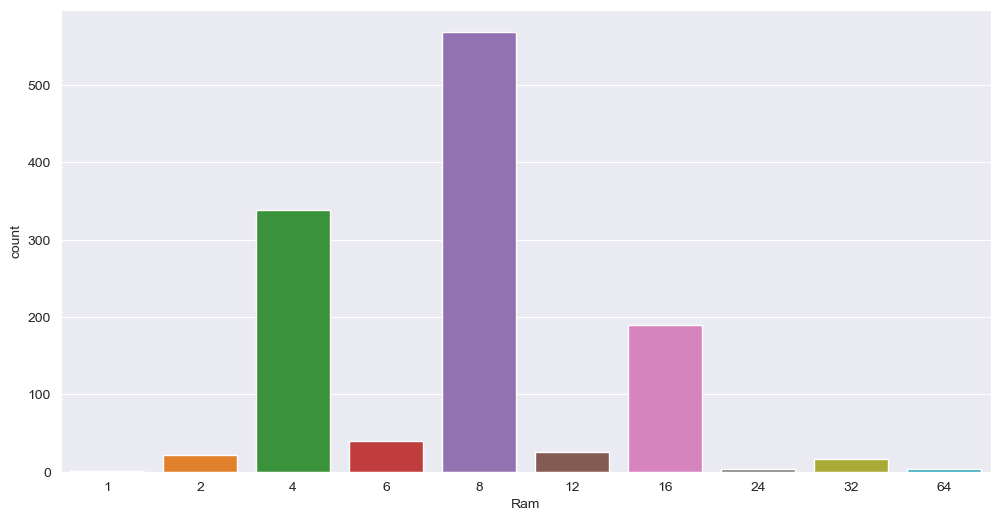

In [213]:
sns.countplot(x=df['Ram'])
plt.show()

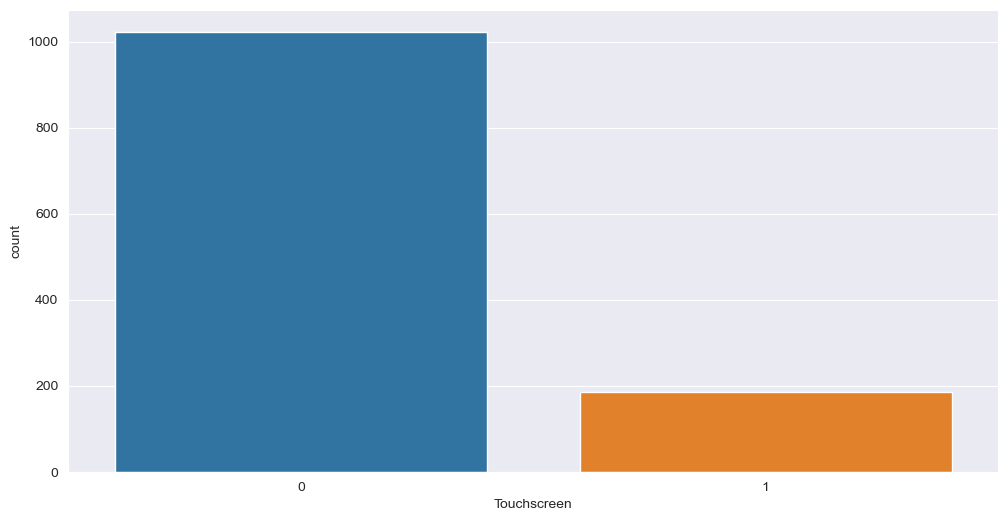

In [214]:
sns.countplot(x=df['Touchscreen'])
plt.show()

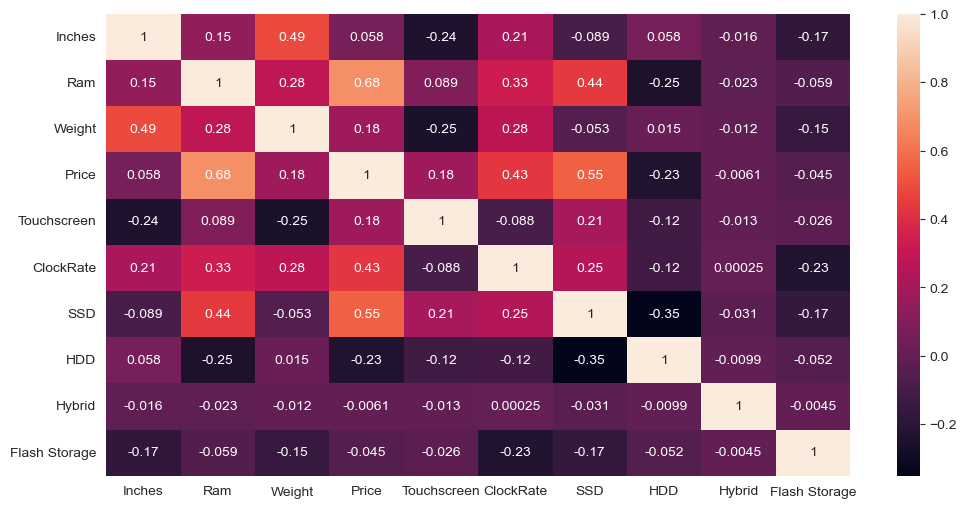

In [215]:
df.replace('?', np.nan, inplace=True)
sns.heatmap(data=df.drop(columns=["Company", "TypeName", "Gpu", "Resolution", "OpSys", "CPU"]).corr(), annot=True)
plt.show()

In [216]:
df

,Company,TypeName,Inches,Ram,Gpu,OpSys,Weight,Price,Touchscreen,Resolution,CPU,ClockRate,SSD,HDD,Hybrid,Flash Storage
0,Apple,Ultrabook,13.3,8,Intel Iris Plus Graphics 640,macOS,1.37,859.98,0,2560x1600,Intel Core i5,2.3,128,0,0,0
1,Apple,Ultrabook,13.3,8,Intel HD Graphics 6000,macOS,1.34,577.05,0,1440x900,Intel Core i5,1.8,0,0,0,128
2,Apple,Ultrabook,15.4,16,AMD Radeon Pro 455,macOS,1.83,1628.86,0,2880x1800,Intel Core i7,2.7,512,0,0,0
3,Apple,Ultrabook,13.3,8,Intel Iris Plus Graphics 650,macOS,1.37,1157.78,0,2560x1600,Intel Core i5,3.1,256,0,0,0
4,Acer,Notebook,15.6,4,AMD Radeon R5,Windows 10,2.10,256.77,0,1366x768,AMD A9-Series 9420,3.0,0,500,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1203,Lenovo,Convertible,14,4,Intel HD Graphics 520,Windows 10,1.80,409.55,1,1920x1080,Intel Core i7 6500U,2.5,128,0,0,0
1204,Lenovo,Convertible,13.3,16,Intel HD Graphics 520,Windows 10,1.30,962.25,1,3200x1800,Intel Core i7 6500U,2.5,512,0,0,0
1205,Lenovo,Notebook,14,2,Intel HD Graphics,Windows 10,1.50,147.00,0,1366x768,Intel Celeron Dual Core N3050,1.6,0,0,0,64
1206,HP,Notebook,15.6,6,AMD Radeon R5 M330,Windows 10,2.19,490.43,0,1366x768,Intel Core i7 6500U,2.5,0,1,0,0
